In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
import yfinance as yf

# Define the stock symbol and date range
symbol = 'AMZN'
start_date = '2022-01-01'
end_date = '2023-01-01'

# Download historical stock data
# amazon_stock_data = yf.download(symbol, start=start_date, end=end_date)
amazon_stock_data = yf.download(symbol)

# Display the first few rows of the data
# amazon_stock_data.head()


[*********************100%%**********************]  1 of 1 completed


In [4]:
amazon_stock_data

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000
...,...,...,...,...,...,...
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000


In [36]:
asd = amazon_stock_data.copy()

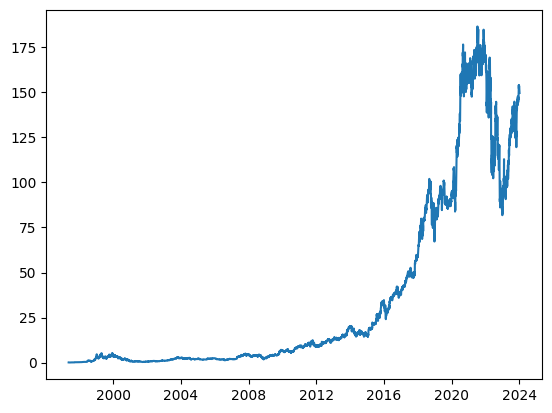

In [37]:
plt.plot(asd['Close'])

In [30]:
from copy import deepcopy as dc

def prepare_dataframe_for_lstm(df, n_steps):
    df = dc(df)
    
    for i in range(1, n_steps+1):
        df[f'Close(t-{i})'] = df['Close'].shift(1)
        
    df.dropna(inplace=True)
        
    return df

lookback = 7
shifted_df = prepare_dataframe_for_lstm(asd, lookback)
shifted_df    

,Open,High,Low,Close,Adj Close,Volume,Close(t-1),Close(t-2),Close(t-3),Close(t-4),Close(t-5),Close(t-6),Close(t-7)
Date,,,,,,,,,,,,,
1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.097917,0.097917,0.097917,0.097917,0.097917,0.097917,0.097917
1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.086458,0.086458,0.086458,0.086458,0.086458,0.086458,0.086458
1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.085417,0.085417,0.085417,0.085417,0.085417,0.085417,0.085417
1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.081771,0.081771,0.081771,0.081771,0.081771,0.081771,0.081771
1997-05-22,0.071875,0.072396,0.065625,0.069792,0.069792,235536000,0.071354,0.071354,0.071354,0.071354,0.071354,0.071354,0.071354
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-27,153.559998,154.779999,153.119995,153.339996,153.339996,31434700,153.410004,153.410004,153.410004,153.410004,153.410004,153.410004,153.410004
2023-12-28,153.720001,154.080002,152.949997,153.380005,153.380005,27057000,153.339996,153.339996,153.339996,153.339996,153.339996,153.339996,153.339996
2023-12-29,153.100006,153.889999,151.029999,151.940002,151.940002,39789000,153.380005,153.380005,153.380005,153.380005,153.380005,153.380005,153.380005


In [31]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
shifted_df_as_np = scaler.fit_transform(shifted_df)

shifted_df_as_np

array([[-0.99969941, -0.9997183 , -0.99978577, ..., -0.99969839,
        -0.99969839, -0.99969839],
       [-0.99981074, -0.99982876, -0.99983087, ..., -0.99982128,
        -0.99982128, -0.99982128],
       [-0.99982745, -0.99983981, -0.99982523, ..., -0.99983244,
        -0.99983244, -0.99983244],
       ...,
       [ 0.63554696,  0.63131074,  0.63404464, ...,  0.64407115,
         0.64407115,  0.64407115],
       [ 0.6188739 ,  0.61529651,  0.60546917, ...,  0.62862882,
         0.62862882,  0.62862882],
       [ 0.59386454,  0.60119119,  0.61304597, ...,  0.60707384,
         0.60707384,  0.60707384]])

In [32]:
X = shifted_df_as_np[:, 1:]
y = shifted_df_as_np[:, 0]

X.shape, y.shape

((6702, 12), (6702,))

In [33]:
split_index = int(len(X) * 0.95)
split_index

6366

In [34]:
X_train = X[:split_index]
X_test = X[split_index:]

y_train = y[:split_index]
y_test = y[split_index:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((6366, 12), (336, 12), (6366,), (336,))

In [29]:
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))

y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

X_train.shape, X_test.shape, y_train.shape, y_test.shape

ValueError: cannot reshape array of size 76392 into shape (7,1)

In [39]:
# Print the shapes before reshaping
print("Before reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

# Attempt reshaping
X_train = X_train.reshape((-1, lookback, 1))
X_test = X_test.reshape((-1, lookback, 1))
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1, 1))

# Print the shapes after reshaping
print("\nAfter reshaping:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


Before reshaping:
X_train shape: (6366, 12)
X_test shape: (336, 12)
y_train shape: (6366,)
y_test shape: (336,)


ValueError: cannot reshape array of size 76392 into shape (7,1)